<a href="https://colab.research.google.com/github/MJKhadeeja/ML-main-projects-Python-/blob/ML-Project-(Classification)/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [1]:
from google.colab import files
files.upload()

Saving diabetes2.csv to diabetes2.csv


{'diabetes2.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,4

In [4]:
diabetes_data=pd.read_csv('diabetes2.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data.shape

(768, 9)

In [10]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

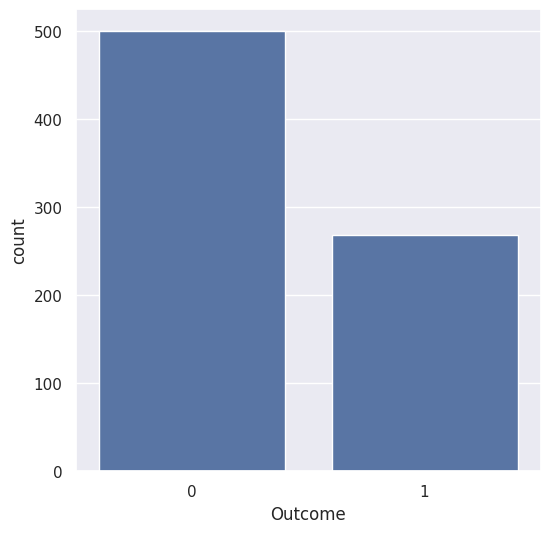

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Outcome',data=diabetes_data)

<Axes: xlabel='Outcome', ylabel='BMI'>

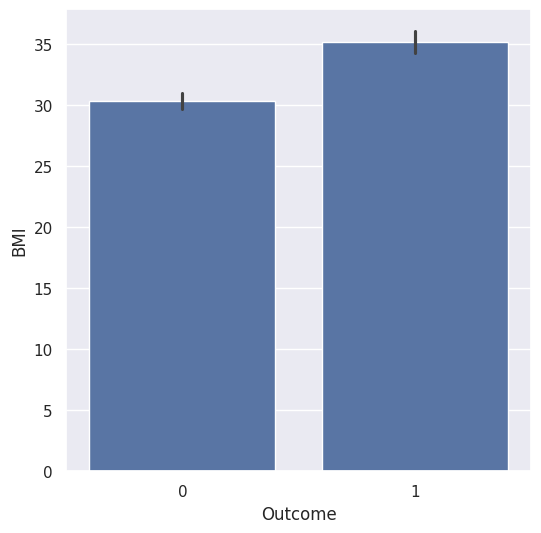

In [12]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome',y='BMI',data=diabetes_data)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

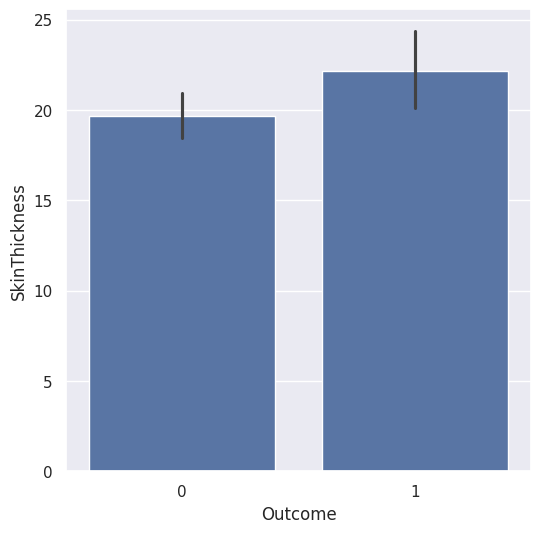

In [13]:
plt.figure(figsize=(6,6))
sns.barplot(x='Outcome',y='SkinThickness',data=diabetes_data)


In [14]:
correlation=diabetes_data.corr()

<Axes: >

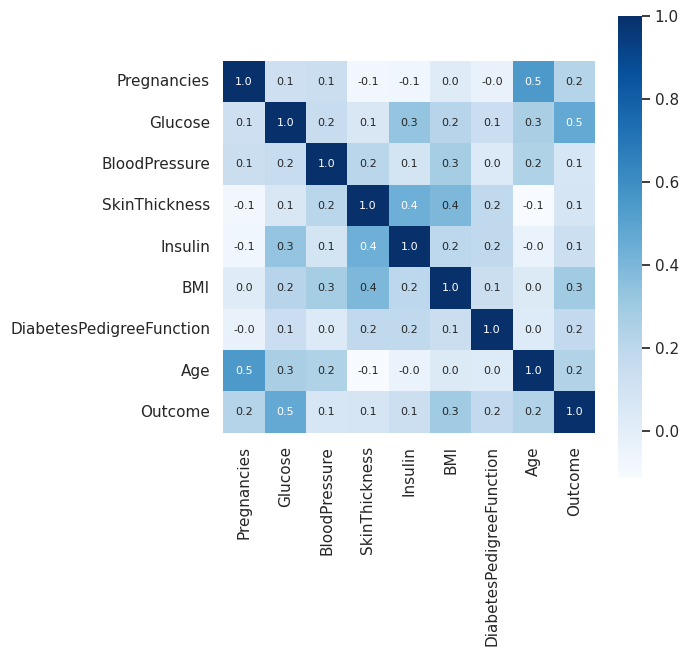

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Splitting x and y


In [16]:
x=diabetes_data.drop('Outcome',axis=1)

In [17]:
y=diabetes_data['Outcome']

In [18]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [19]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting x_train,x_test,y_train,y_test

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [22]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
678            3      121             52              0        0  36.0   
53             8      176             90             34      300  33.7   
665            1      112             80             45      132  34.8   
219            5      112             66              0        0  37.8   
720            4       83             86             19        0  29.3   
..           ...      ...            ...            ...      ...   ...   
88            15      136             70             32      110  37.1   
137            0       93             60             25       92  28.7   
645            2      157             74             35      440  39.4   
308            0      128             68             19      180  30.5   
332            1      180              0              0        0  43.3   

     DiabetesPedigreeFunction  Age  
678                     0.127   25  
53                      0.467   58  


In [23]:
print(y_train)

678    1
53     1
665    0
219    1
720    0
      ..
88     1
137    0
645    0
308    1
332    1
Name: Outcome, Length: 614, dtype: int64


Model selection

In [24]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
x_train_prediction1=model1.predict(x_train)
train_data_accuracy1=accuracy_score(y_train,x_train_prediction1)

In [26]:
print('The train data accuracy in Logistic is',train_data_accuracy1)

The train data accuracy in Logistic is 0.7850162866449512


In [27]:
x_test_prediction1=model1.predict(x_test)

In [28]:
test_data_accuracy1=accuracy_score(y_test,x_test_prediction1)

In [29]:
print('The test data accuracy in Logistic is',test_data_accuracy1)

The test data accuracy in Logistic is 0.7857142857142857


In [30]:
x_test.to_csv('diabetics_data.csv',index=False)
from google.colab import files
files.download('diabetics_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
input_data=(1,172,68,49,579,42.4,0.702,28)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=model1.predict(input_data_reshaped)
print(prediction[0])

if(prediction[0]==0):
  print('the person do not have diabetes')
else:
  print('the person have diabetes')

1
the person have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
x_train_prediction2=model2.predict(x_train)
train_data_accuracy2=accuracy_score(y_train,x_train_prediction2)

In [36]:
print('The train data accuracy in Decision Tree is',train_data_accuracy2)

The train data accuracy in Decision Tree is 1.0


In [37]:
x_test_prediction2=model2.predict(x_test)
test_data_accuracy2=accuracy_score(y_test,x_test_prediction2)

In [38]:
print('The test data accuracy in Decision Tree is',test_data_accuracy2)

The test data accuracy in Decision Tree is 0.7337662337662337


In [39]:
input_data=(1,172,68,49,579,42.4,0.702,28)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=model2.predict(input_data_reshaped)
print(prediction[0])

if(prediction[0]==0):
  print('the person do not have diabetes')
else:
  print('the person have diabetes')

1
the person have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
x_train_prediction3=model3.predict(x_train)
train_data_accuracy3=accuracy_score(y_train,x_train_prediction3)

In [42]:
print('The train data accuracy in RF is',train_data_accuracy3)

The train data accuracy in RF is 1.0


In [43]:
x_test_prediction3=model3.predict(x_test)
test_data_accuracy3=accuracy_score(y_test,x_test_prediction3)

In [44]:
print('The test data accuracy in RF is',test_data_accuracy3)

The test data accuracy in RF is 0.7467532467532467


In [45]:
input_data=(1,172,68,49,579,42.4,0.702,28)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=model3.predict(input_data_reshaped)
print(prediction[0])

if(prediction[0]==0):
  print('the person do not have diabetes')
else:
  print('the person have diabetes')

1
the person have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
model4=GaussianNB()
model4.fit(x_train,y_train)

GaussianNB()

In [47]:
x_train_prediction4=model4.predict(x_train)
train_data_accuracy4=accuracy_score(y_train,x_train_prediction4)

In [48]:
print('The train data accuracy in naive bayes is',train_data_accuracy4)

The train data accuracy in naive bayes is 0.7785016286644951


In [49]:
x_test_prediction4=model4.predict(x_test)
test_data_accuracy4=accuracy_score(y_test,x_test_prediction4)

In [50]:
print('The test data accuracy in naive bayes is',test_data_accuracy4)

The test data accuracy in naive bayes is 0.7077922077922078


In [51]:
input_data=(1,172,68,49,579,42.4,0.702,28)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=model4.predict(input_data_reshaped)
print(prediction[0])

if(prediction[0]==0):
  print('the person do not have diabetes')
else:
  print('the person have diabetes')

1
the person have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [52]:
model5=KNeighborsClassifier()
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
x_train_prediction5=model5.predict(x_train)
train_data_accuracy5=accuracy_score(y_train,x_train_prediction5)

In [54]:
print('The training data accuracy in KNN is',train_data_accuracy5)

The training data accuracy in KNN is 0.8061889250814332


In [55]:
x_test_prediction5=model5.predict(x_test)
test_data_accuracy5=accuracy_score(y_test,x_test_prediction5)

In [56]:
print('The testing data accuracy in KNN is',test_data_accuracy5)

The testing data accuracy in KNN is 0.7012987012987013


In [57]:
input_data=(1,172,68,49,579,42.4,0.702,28)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=model5.predict(input_data_reshaped)
print(prediction[0])

if(prediction[0]==0):
  print('the person do not have diabetes')
else:
  print('the person have diabetes')

1
the person have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [58]:
scaler=StandardScaler()

In [59]:
scaler.fit(x)

StandardScaler()

In [60]:
standardised_data=scaler.transform(x)

In [61]:
print(standardised_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [62]:
x1=standardised_data
y1=diabetics_data['Outcome']

In [63]:
print(x1)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [64]:
print(y1)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,stratify=y,random_state=1)

In [66]:
model6=svm.SVC(kernel='linear')

In [67]:
model6.fit(x_train,y_train)

SVC(kernel='linear')

In [68]:
x_train_prediction6=model6.predict(x_train)
train_data_accuracy6=accuracy_score(y_train,x_train_prediction6)

In [69]:
print('The train data accuracy in SVM is',train_data_accuracy6)

The train data accuracy in SVM is 0.7833876221498371


In [70]:
x_test_prediction6=model6.predict(x_test)
test_data_accuracy6=accuracy_score(y_test,x_test_prediction6)

In [71]:
print('The test data accuracy in SVM is',test_data_accuracy6)

The test data accuracy in SVM is 0.7792207792207793


In [72]:
input_data=(1,172,68,49,579,42.4,0.702,28)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=model6.predict(input_data_reshaped)
print(prediction[0])

if(prediction[0]==0):
  print('the person do not have diabetes')
else:
  print('the person have diabetes')

1
the person have diabetes


In [73]:
#Logistic Regression has the most accuracy and KNN has the least accuracy for this diabetes data set.

In [74]:
# While Predicting the chances of occurrence of Diabetes in different peoples we arrive to the conclusion that the person with the input-data set that we provided seems to have diabetes.

In [75]:
# We can change the input-data as our preference to predict the chances of occurrence of diabetes for different persons.